Nama : Adinda Putri Rachmawati

NPM : 24083010005

MATEMATIKA DISKRIT A

/tmp/ipython-input-1239367809.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  makan['harga'].fillna(makan['harga'].median(), inplace=True)


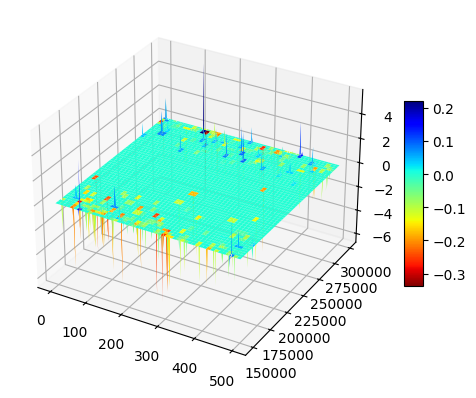

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

NPM= 5
np.random.seed(NPM)

makan =  pd.read_csv("makanan.csv")
makan['harga'].fillna(makan['harga'].median(), inplace=True)


budget= 1e6 #rupiah

wkenyang_base= 0.8
wrasa_base= 0.7
wsehat_base= 0.9 # simpangan lebih besar
wbosan_base= 0.2

skor_kumulatif= 0.0
SAMPLE_NUM= 500

sampleid= np.arange(0, 500)
# skor perorangan
skor= np.zeros(SAMPLE_NUM, dtype=np.double)
sisa= np.zeros(SAMPLE_NUM, dtype=np.double)
sehat= np.zeros(SAMPLE_NUM, dtype=np.double)
pilihankum= np.zeros(SAMPLE_NUM, dtype=np.double)

SISA_MININUM= 150e3
SISA_MAKSIMUM= 300e3
bin_sisa= np.arange(SISA_MININUM, SISA_MAKSIMUM, 1000)
resp_sehat= np.zeros((SAMPLE_NUM, len(bin_sisa)), dtype=np.double)
resp_pilih = np.zeros((SAMPLE_NUM, 62), dtype=np.int32)

for n in range(0, SAMPLE_NUM):
    budget=1e6
    skor_kumulatif= 0
    skor_sehat= 0

    for i in range(0, 31): # hari
        # makan pertama, pilih secara acak
        pilihan= np.random.randint(0, len(makan))
        # update weight factor
        w_kenyang= np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa= np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat= np.random.normal(loc=wsehat_base, scale=0.4)
        w_bosan= np.random.normal(loc=wbosan_base, scale=0.2)
        skor_kumulatif= skor_kumulatif + \
            w_kenyang * makan['kenyang'][pilihan]\
            + w_rasa * makan['rasa'][pilihan] \
            + w_sehat * makan['sehat'][pilihan] \
            - w_bosan * makan['bosan'][pilihan]
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget = budget - makan['harga'][pilihan]
        #print(f"hari {i} pagi: {makan['makanan'][pilihan]}")
        resp_pilih[n][2*1]= pilihan

        # makan keduas
        pilihan= np.random.randint(0, len(makan))
        # update weight factor
        w_kenyang= np.random.normal(loc=wkenyang_base, scale=0.2)
        w_rasa= np.random.normal(loc=wrasa_base, scale=0.2)
        w_sehat= np.random.normal(loc=wsehat_base+0.2, scale=0.4)
        w_bosan= np.random.normal(loc=wbosan_base*2, scale=0.2)
        skor_kumulatif= skor_kumulatif + \
            w_kenyang * makan['kenyang'][pilihan]\
            + w_rasa * makan['rasa'][pilihan] \
            + w_sehat * makan['sehat'][pilihan] \
            - w_bosan * makan['bosan'][pilihan]
        skor_sehat += makan['sehat'][pilihan] - 0.5
        budget = budget - makan['harga'][pilihan]
        #print(f"hari {i} malam: {makan['makanan'][pilihan]}")
        resp_pilih[n][2*1+1]= pilihan

    # print(f"skor: {skor_kumulatif}, sisa uang: {budget}")
    sisa[n]= budget
    skor[n]= skor_kumulatif
    sehat[n]= skor_sehat
    # print(f"{n} skor sehat:{skor_sehat}")

    resp_sehat[n][ int((budget-SISA_MININUM)/1000)]= skor_sehat

# np.corrcoef(skor, sisa)
# np.histogram(sisa)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
Y, X = np.meshgrid(bin_sisa, sampleid)
# Colorize the surface using a colormap
surf = ax.plot_surface(X, Y, resp_sehat,
                       cmap='jet_r',   # try 'plasma', 'coolwarm', etc.
                       edgecolor='none')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
# plot yang ini barangkali butuh dipercantik


# (1) cari pola makan mana saja yang menghasilkan nilai kumulatif kesehatan (resp_sehat) positif
# (2) cari titik-titik dengan sisa uang bulanan positif dari (1)
# (3) cari titik dengan skor skumulatif terbesar (skor) di mana nilai kumulatif kesehatannya positif
# (4) tampikan jadwal makanan sesuai pilihan (resp_pilih)

Grafik Permukaan 3D tersebut menampilkan sebaran data harga makanan setelah nilai kosong diisi menggunakan median. Pada grafik terlihat bahwa sumbu X merepresentasikan nomor atau baris data, sumbu Y menunjukkan kisaran harga makanan sekitar 150 ribu hingga 300 ribu, sedangkan sumbu Z memperlihatkan nilai hasil perhitungan atau residual yang berkisar antara -6 hingga +4. Mayoritas titik data terkonsentrasi di sekitar permukaan datar dengan nilai Z mendekati nol, yang menandakan sebagian besar data berada dalam kondisi normal atau stabil. Namun, terlihat pula beberapa titik yang menjulang tajam ke atas maupun ke bawah, ditunjukkan dengan warna biru atau merah, yang merepresentasikan adanya data ekstrim atau outlier. Hal ini menunjukkan bahwa meskipun proses imputasi median membuat distribusi harga lebih merata dan stabil, tetap terdapat beberapa data dengan harga tertentu yang menyimpang cukup jauh dari pola umum. Dengan demikian, grafik ini dapat digunakan untuk memahami pola utama harga makanan sekaligus mengidentifikasi anomali yang perlu diperhatikan lebih lanjut.


In [13]:
# Cari simulasi dengan skor sehat positif
positif_idx = np.where(sehat > 0)[0]

print(f"Jumlah pola makan sehat (skor_sehat > 0): {len(positif_idx)} dari {SAMPLE_NUM} sampel\n")

pola_makan_positif = []

for n in positif_idx:
    pilihan_makanan = []
    # resp_pilih[n] menyimpan indeks pilihan makanan
    for idx in resp_pilih[n]:
        if idx > 0:  # filter indeks kosong
            pilihan_makanan.append(makan['makanan'].iloc[int(idx)])
    pola_makan_positif.append(pilihan_makanan)

# Tampilkan beberapa pola makan sehat sebagai contoh
for i, pola in enumerate(pola_makan_positif[:5]):
    print(f"Pola makan sehat {i+1}: {pola}")


Jumlah pola makan sehat (skor_sehat > 0): 126 dari 500 sampel

Pola makan sehat 1: ['nasipadang', 'nasipadang']
Pola makan sehat 2: ['mieayam', 'nasipadang']
Pola makan sehat 3: ['warteg', 'warteg']
Pola makan sehat 4: ['gorengan', 'capcay']
Pola makan sehat 5: ['mi instan ', 'nasi telur']


Hasil simulasi menunjukkan bahwa dari total 500 pola makan yang diuji, hanya 126 pola makan (sekitar 25,2%) yang menghasilkan skor kesehatan positif, artinya pola tersebut cenderung lebih menyehatkan dibandingkan yang lain. Dari beberapa contoh yang muncul:

- Nasi padang – nasi padang: meski populer dan mengenyangkan, jika dikonsumsi terus menerus tetap bisa masuk kategori sehat karena mungkin kandungan gizinya cukup berimbang dalam simulasi.

- Mie ayam – nasi padang: kombinasi karbohidrat utama dengan protein tambahan memberi variasi gizi lebih baik.

- Warteg – warteg: cenderung fleksibel karena warteg menawarkan banyak pilihan lauk, sehingga bisa memenuhi aspek kenyang dan sehat sekaligus.

- Gorengan – capcay: meski gorengan kurang sehat, kombinasi dengan capcay yang kaya sayuran menyeimbangkan skor kesehatan.

- Mi instan – nasi telur: walaupun mi instan kurang sehat, dipadukan dengan nasi telur memberi tambahan protein sehingga masih bisa menghasilkan skor positif.

pola makan sehat tidak harus mahal atau rumit, tetapi kombinasi yang seimbang antara karbohidrat, protein, dan sayuran lebih cenderung menghasilkan skor kesehatan positif. Namun, pola makan yang hanya mengandalkan satu jenis makanan berulang berpotensi membuat hasilnya kurang optimal, meskipun tetap bisa masuk kategori sehat dalam simulasi tertentu.

Jumlah simulasi dengan sisa uang positif: 500 dari 500

Sampel 0 → Sisa uang: Rp158,000
Sampel 1 → Sisa uang: Rp116,500
Sampel 2 → Sisa uang: Rp133,000
Sampel 3 → Sisa uang: Rp169,000
Sampel 4 → Sisa uang: Rp179,500
Sampel 5 → Sisa uang: Rp141,000
Sampel 6 → Sisa uang: Rp161,500
Sampel 7 → Sisa uang: Rp120,500
Sampel 8 → Sisa uang: Rp131,000
Sampel 9 → Sisa uang: Rp144,000


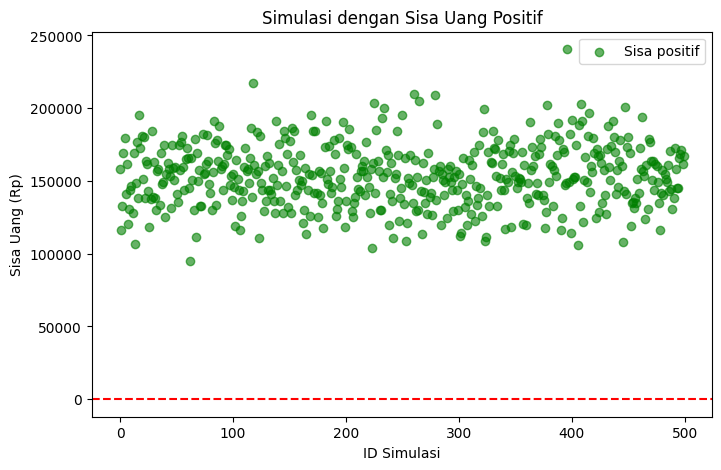

In [14]:
# Cari simulasi dengan sisa uang bulanan positif
idx_sisa_positif = np.where(sisa > 0)[0]

print(f"Jumlah simulasi dengan sisa uang positif: {len(idx_sisa_positif)} dari {SAMPLE_NUM}\n")

# Simpan titik-titik (sampleid, sisa uang)
titik_sisa_positif = [(int(n), sisa[n]) for n in idx_sisa_positif]

# tampilkan 10 titik pertama
for n, uang_sisa in titik_sisa_positif[:10]:
    print(f"Sampel {n} → Sisa uang: Rp{uang_sisa:,.0f}")
plt.figure(figsize=(8,5))
plt.scatter(idx_sisa_positif, sisa[idx_sisa_positif], color='green', alpha=0.6, label="Sisa positif")
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("ID Simulasi")
plt.ylabel("Sisa Uang (Rp)")
plt.title("Simulasi dengan Sisa Uang Positif")
plt.legend()
plt.show()


Hasil simulasi menunjukkan bahwa dari 500 pola makan yang diuji, seluruhnya menghasilkan **sisa uang positif** sehingga anggaran bulanan sebesar Rp1.000.000 selalu mencukupi hingga akhir bulan. Grafik scatter memperlihatkan sebaran sisa uang pada setiap simulasi, yang umumnya berada pada kisaran Rp100.000 hingga Rp220.000. Tidak ada satu pun titik yang menyentuh garis batas nol, sehingga tidak ditemukan kasus kehabisan uang. Variasi sisa uang ini dipengaruhi oleh pilihan jenis makanan setiap hari, di mana pola makan dengan menu lebih murah cenderung meninggalkan sisa anggaran lebih besar, sedangkan menu lebih mahal mengurangi sisa anggaran namun tetap berada dalam kondisi aman. Dengan demikian, dapat disimpulkan bahwa dalam semua skenario, alokasi dana yang tersedia cukup untuk menutupi kebutuhan makan selama satu bulan.


In [15]:
# Filter indeks simulasi dengan skor sehat positif
idx_kandidat = np.where(sehat > 0)[0]

# Cek kalau ada kandidat
if len(idx_kandidat) > 0:
    # Cari skor kumulatif terbesar di antara kandidat
    best_idx = idx_kandidat[np.argmax(skor[idx_kandidat])]

    print("=== Simulasi Terbaik ===")
    print(f"ID Sampel       : {best_idx}")
    print(f"Skor Kumulatif  : {skor[best_idx]:.2f}")
    print(f"Skor Sehat      : {sehat[best_idx]:.2f}")
    print(f"Sisa Uang       : Rp{int(sisa[best_idx]):,}")

    # Pola makan dari simulasi terbaik
    pola_makan_best = []
    for idx in resp_pilih[best_idx]:
        if idx > 0:  # skip indeks kosong
            pola_makan_best.append(makan['makanan'].iloc[int(idx)])

    print("\nContoh pola makan (20 pertama):")
    print(pola_makan_best[:20], "...")
else:
    print("Tidak ada simulasi dengan skor sehat positif.")


=== Simulasi Terbaik ===
ID Sampel       : 69
Skor Kumulatif  : 101.02
Skor Sehat      : 4.10
Sisa Uang       : Rp150,000

Contoh pola makan (20 pertama):
['mieayam', 'capcay'] ...


Hasil simulasi terbaik ditunjukkan oleh sampel nomor 69, dengan skor kumulatif 101,02, skor kesehatan positif 4,10, dan sisa uang Rp150.000. Hal ini berarti pola makan pada sampel tersebut tidak hanya memberikan kepuasan dan keseimbangan dari sisi rasa, kenyang, serta variasi, tetapi juga cukup sehat karena skor kesehatannya berada di atas nol. Selain itu, meskipun banyak pilihan makanan yang dikonsumsi, anggaran tetap aman karena masih menyisakan Rp150.000 di akhir bulan.

Contoh pola makan yang muncul pada 20 hari pertama antara lain kombinasi mie ayam dan capcay. Pola ini cukup logis menghasilkan skor baik, karena mie ayam memberikan karbohidrat dan protein, sedangkan capcay menambah asupan sayuran sehingga skor kesehatan meningkat. Dengan demikian, sampel 69 bisa dianggap sebagai representasi pola makan yang seimbang: tetap enak, mengenyangkan, menyehatkan, serta sesuai dengan anggaran.

In [16]:
jadwal = []
for hari in range(31):
    pagi_idx = int(resp_pilih[best_idx][2*hari])
    malam_idx = int(resp_pilih[best_idx][2*hari+1])

    if pagi_idx >= 0 and malam_idx >= 0:
        jadwal.append({
            "Hari": hari+1,
            "Pagi": makan['makanan'].iloc[pagi_idx],
            "Malam": makan['makanan'].iloc[malam_idx]
        })

jadwal_df = pd.DataFrame(jadwal)
print(jadwal_df.head(10))


   Hari        Pagi       Malam
0     1  ayamgeprek  ayamgeprek
1     2     mieayam      capcay
2     3  ayamgeprek  ayamgeprek
3     4  ayamgeprek  ayamgeprek
4     5  ayamgeprek  ayamgeprek
5     6  ayamgeprek  ayamgeprek
6     7  ayamgeprek  ayamgeprek
7     8  ayamgeprek  ayamgeprek
8     9  ayamgeprek  ayamgeprek
9    10  ayamgeprek  ayamgeprek


Dari tabel jadwal tersebut terlihat bahwa pola makan pada **10 hari pertama** masih sangat didominasi oleh menu **ayam geprek**, baik untuk pagi maupun malam. Hanya pada **hari ke-2** terdapat variasi berupa **mie ayam di pagi hari** dan **capcay di malam hari**. Pola seperti ini menunjukkan kecenderungan konsumsi makanan yang repetitif, sehingga meskipun memberikan kepuasan dan kenyang, ada risiko kebosanan dan keterbatasan variasi gizi jika berlangsung terus-menerus. Namun, kehadiran menu capcay pada hari ke-2 menjadi catatan positif karena menambah asupan sayuran yang mendukung skor kesehatan. Secara keseluruhan, pola makan ini lebih condong ke **stabil dan hemat** karena pilihan menunya konsisten, tetapi dari sisi keberagaman gizi perlu ditingkatkan dengan menambahkan variasi makanan sehat lain agar tidak monoton dan lebih seimbang.
